<a href="https://colab.research.google.com/github/MasoudMoeini/MINST-Data-Set-MLP_Prediction-Model-Using-Tensorflow/blob/master/simple_mnist__convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [5]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
model.save('model.h5')

Epoch 1/15
422/422 [==============================] - 15s 6ms/step - loss: 0.3594 - accuracy: 0.8892 - val_loss: 0.0778 - val_accuracy: 0.9787
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1103 - accuracy: 0.9654 - val_loss: 0.0531 - val_accuracy: 0.9857
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0826 - accuracy: 0.9742 - val_loss: 0.0478 - val_accuracy: 0.9883
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0703 - accuracy: 0.9776 - val_loss: 0.0426 - val_accuracy: 0.9885
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0614 - accuracy: 0.9806 - val_loss: 0.0446 - val_accuracy: 0.9882
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.0379 - val_accuracy: 0.9900
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0527 - accuracy: 0.9827 - val_loss: 0.0373 - val_accuracy: 0.9908
Epoch

In [6]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


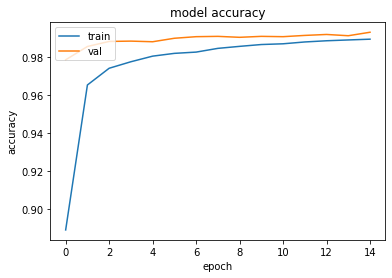

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

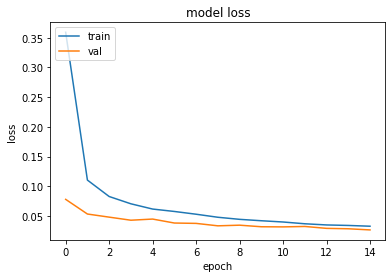

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.022854609414935112
Test accuracy: 0.9919000267982483


In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
y_test.shape

(10000,)

In [13]:
y_test[0]

7

In [21]:
from PIL import Image
label_img = Image.fromarray(x_test[100])
label_img.save("output2"+'.jpg', 'JPEG', quality=90) 

In [14]:
from keras.models import load_model
model = load_model("model.h5")
img = x_test[0]
img = img.astype(np.float32)/ 255.0
img = np.expand_dims(img,-1)
img= np.expand_dims(img, 0)
img.shape
pred = model.predict(img)

In [15]:
pred

array([[5.8282872e-11, 1.3989442e-10, 6.7182930e-07, 1.6319723e-07,
        4.2105268e-13, 3.5911964e-11, 1.8454131e-17, 9.9999905e-01,
        1.7720483e-09, 8.0305625e-08]], dtype=float32)

In [16]:
def pred_num(pred_val):
  for i in range(10):
    if (pred_val[i] <0.5):
      pred_val[i]=0
    else:
      pred_val[i]=1
      num=i
  return num

In [17]:
pred_num(pred[0])

7

In [18]:
from keras.models import load_model
images = x_test[0:100]
model = load_model("model.h5")
predictions=[]
for i in range(len(images)):
  img = images[i]
  img = img.astype(np.float32)/ 255.0
  img = np.expand_dims(img, -1)
  img = np.expand_dims(img, 0)
  pred = model.predict(img)
  predictions.append(pred[0])

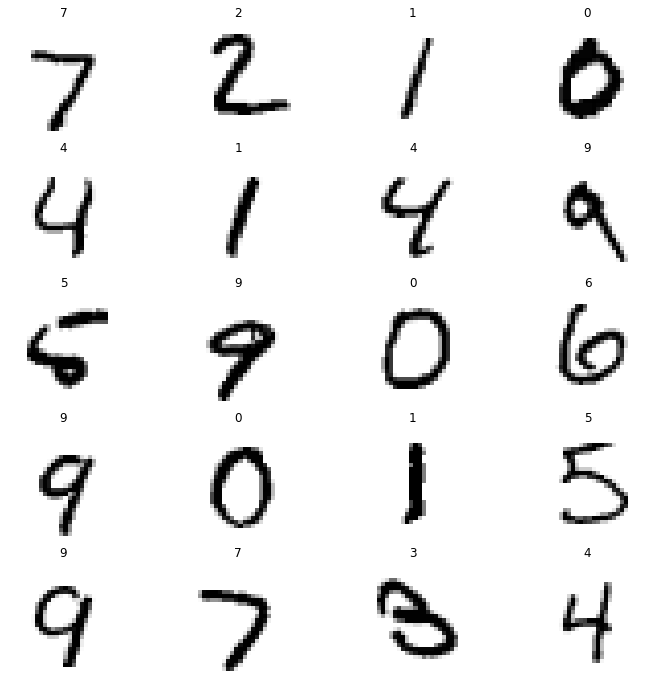

In [19]:
fig = plt.figure(figsize=(12,12))
columns = 4
rows = 5
for i in range(0, columns*rows):
  fig.add_subplot(rows, columns,i+1)
  plt.imshow(images[i],cmap='binary')
  plt.title(pred_num(predictions[i]))
  plt.axis("off")
plt.show()